In [33]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
from cProfile import label
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import powerlaw as pl

%matplotlib inline

In [34]:
def plot_degree_dist(G):
    
    degrees = [G.degree(n, weight = 'weight') for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=21)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=21)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    print(bin_edges)
    print(density)
    
    fig = plt.figure(figsize=(16,16))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    fit = pl.Fit(degrees, xmin=min(degrees), xmax=max(degrees))
    print('gamma= ',fit.truncated_power_law.parameter2)
    fit.power_law.plot_pdf(color='black')
    
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [35]:
df = pd.read_csv('../data/fulldata-name.csv', header=0)
df = df[df['Importer reported quantity'].notnull()]
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc

taxons = {}
purpose = {}
       
        
for index, row in df.iterrows():
    details = {"Appendix": row['Appendix'], "Class": row['Class'], "Order": row['Order'], "Family": row['Family'], "Genus": row['Genus']}
    
    if(row['Purpose'] == "B"):
        purposeCode = "Breeding"
    if(row['Purpose'] == "E"):
        purposeCode = "Educational"
    if(row['Purpose'] == "G"):
        purposeCode = "Garden"
    if(row['Purpose'] == "H"):
        purposeCode = "Hunting"
    if(row['Purpose'] == "L"):
        purposeCode = "Law"
    if(row['Purpose'] == "M"):
        purposeCode = "Medical"
    if(row['Purpose'] == "R"):
        purposeCode = "Reintroduction to wild"
    if(row['Purpose'] == "P"):
        purposeCode = "Personal"
    if(row['Purpose'] == "Q"):
        purposeCode = "Circus"
    if(row['Purpose'] == "S"):
        purposeCode = "Scientific"
    if(row['Purpose'] == "T"):
        purposeCode = "Commercial"
    if(row['Purpose'] == "Z"):
        purposeCode = "Zoo"
    if(row['Purpose'] == "Unspecified"):
        purposeCode = "Unspecified"
        
    attributes = {"Details": details}

    taxons.update({row['Taxon']: row['Taxon']})
    if G.has_node(row['Taxon']):
        if purposeCode not in G.nodes[row['Taxon']]['purpose']:  
            G.nodes[row['Taxon']]['purpose'].append(purposeCode)
    else:
        purpose = [purposeCode]
        G.add_node(row['Taxon'], **details, purpose = [purposeCode])

df2 = df.drop_duplicates(['Taxon', 'Importer'])
for i, group in df2.groupby(['Importer'])['Taxon']: #https://stackoverflow.com/questions/35089255/pandas-reshape-dataframe-to-edge-list-according-to-column-values
    # generate all combinations without replacement 
    # from the group of similar column pairs
    for u, v in itertools.combinations(group, 2):        
        if(G.has_edge(u,v)):
            G[u][v]['weight'] += 1
        else:
            G.add_edge(u, v, weight = 1, countries = [i])

nx.write_gml(G, "taxon-taxon-importer.gml")


Number of nodes:  1423
Number of edges:  425072

Weighted average degree: 1101.4982431482783
Minimum degree:  3
Maximum degree:  6251

[3.00000000e+00 4.93244972e+00 8.10968675e+00 1.33335407e+01
 2.19223397e+01 3.60436128e+01 5.92611026e+01 9.74341364e+01
 1.60196326e+02 2.63386775e+02 4.33047342e+02 7.11994746e+02
 1.17062610e+03 1.92468479e+03 3.16447031e+03 5.20286357e+03
 8.55428765e+03 1.40645312e+04 2.31241977e+04 3.80196476e+04
 6.25100000e+04]
[2.18191660e-03 2.21179812e-03 4.03575996e-04 6.54564800e-04
 6.96705572e-04 3.02677289e-04 3.86596322e-04 1.13088485e-03
 9.67038898e-04 5.30180996e-04 8.43951680e-04 3.34031833e-04
 1.78001359e-04 7.08530502e-05 3.61989876e-05 1.25810522e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


c:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /
c:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


gamma=  0.00012519263626261995


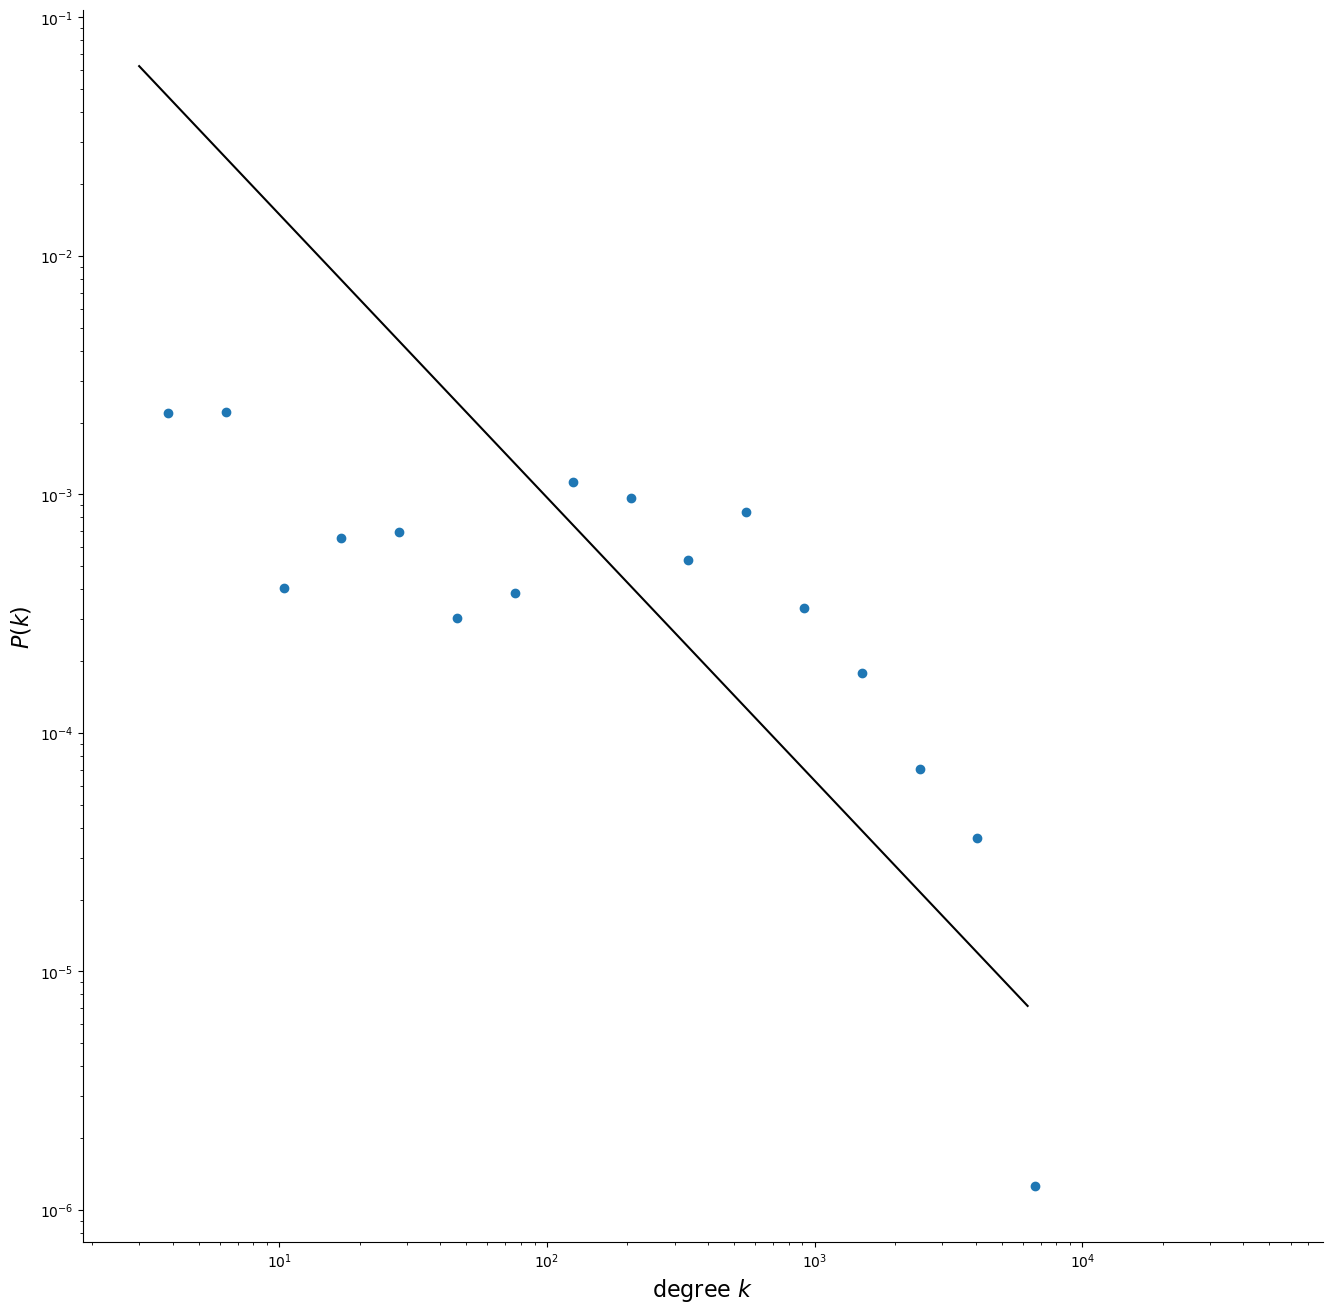

In [36]:
degrees = [G.degree(n, weight = 'weight') for n in G.nodes()]
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print()
print("Weighted average degree:", np.mean(degrees))
print("Minimum degree: ", min(degrees))
print("Maximum degree: ", max(degrees))
print()
plot_degree_dist(G)

In [37]:
C = np.mean(list(nx.clustering(G).values()))
print("Unweighted average Clustering Coefficient: ", C)

print("Weighted average clustering coefficient: ", nx.average_clustering(G, weight='weight'))

print("Number of connected components: ", nx.number_connected_components(G))

d = nx.average_shortest_path_length(G)

print("Average shortest path length: ", d)


Unweighted average Clustering Coefficient:  0.8592404898918155
Weighted average clustering coefficient:  0.03331391018137013
Number of connected components:  1
Average shortest path length:  1.5859740470253114


[3.00000000e+00 4.93086677e+00 8.10448238e+00 1.33207076e+01
 2.18942115e+01 3.59858134e+01 5.91470838e+01 9.72154634e+01
 1.59785499e+02 2.62627003e+02 4.31659588e+02 7.09485307e+02
 1.16612584e+03 1.91667039e+03 3.15028211e+03 5.17787379e+03
 8.51046861e+03 1.39879956e+04 2.29909810e+04 3.77884880e+04
 6.21100000e+04]
[2.18370537e-03 2.21432201e-03 4.04166225e-04 6.55732542e-04
 6.48303085e-04 3.33753176e-04 3.87659118e-04 1.11189529e-03
 1.00448630e-03 5.86197254e-04 8.82771047e-04 3.60111091e-04
 1.63853859e-04 6.15234056e-05 3.22327639e-05 1.05434463e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
gamma=  0.00013445581233416598
[3.00000000e+00 4.93244972e+00 8.10968675e+00 1.33335407e+01
 2.19223397e+01 3.60436128e+01 5.92611026e+01 9.74341364e+01
 1.60196326e+02 2.63386775e+02 4.33047342e+02 7.11994746e+02
 1.17062610e+03 1.92468479e+03 3.16447031e+03 5.20286357e+03
 8.55428765e+03 1.40645312e+04 2.31241977e+04 3.80196476e+04
 6.25100000e+04]
[2.18191660e-03 2.2

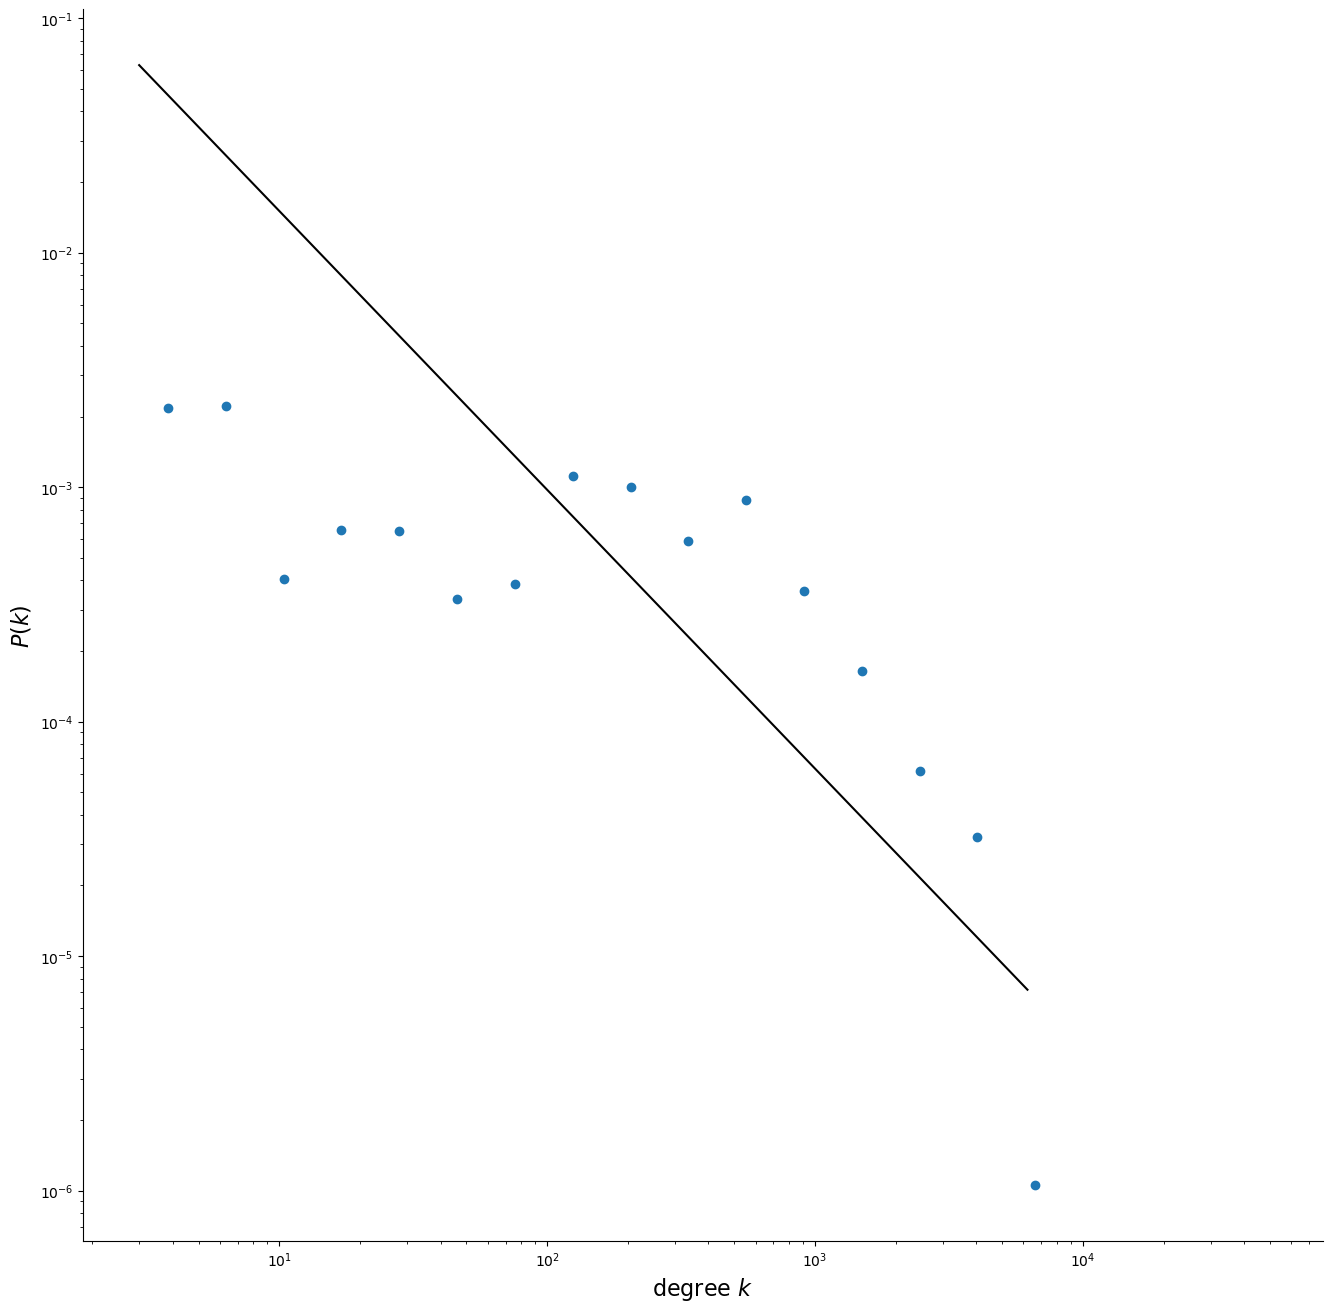

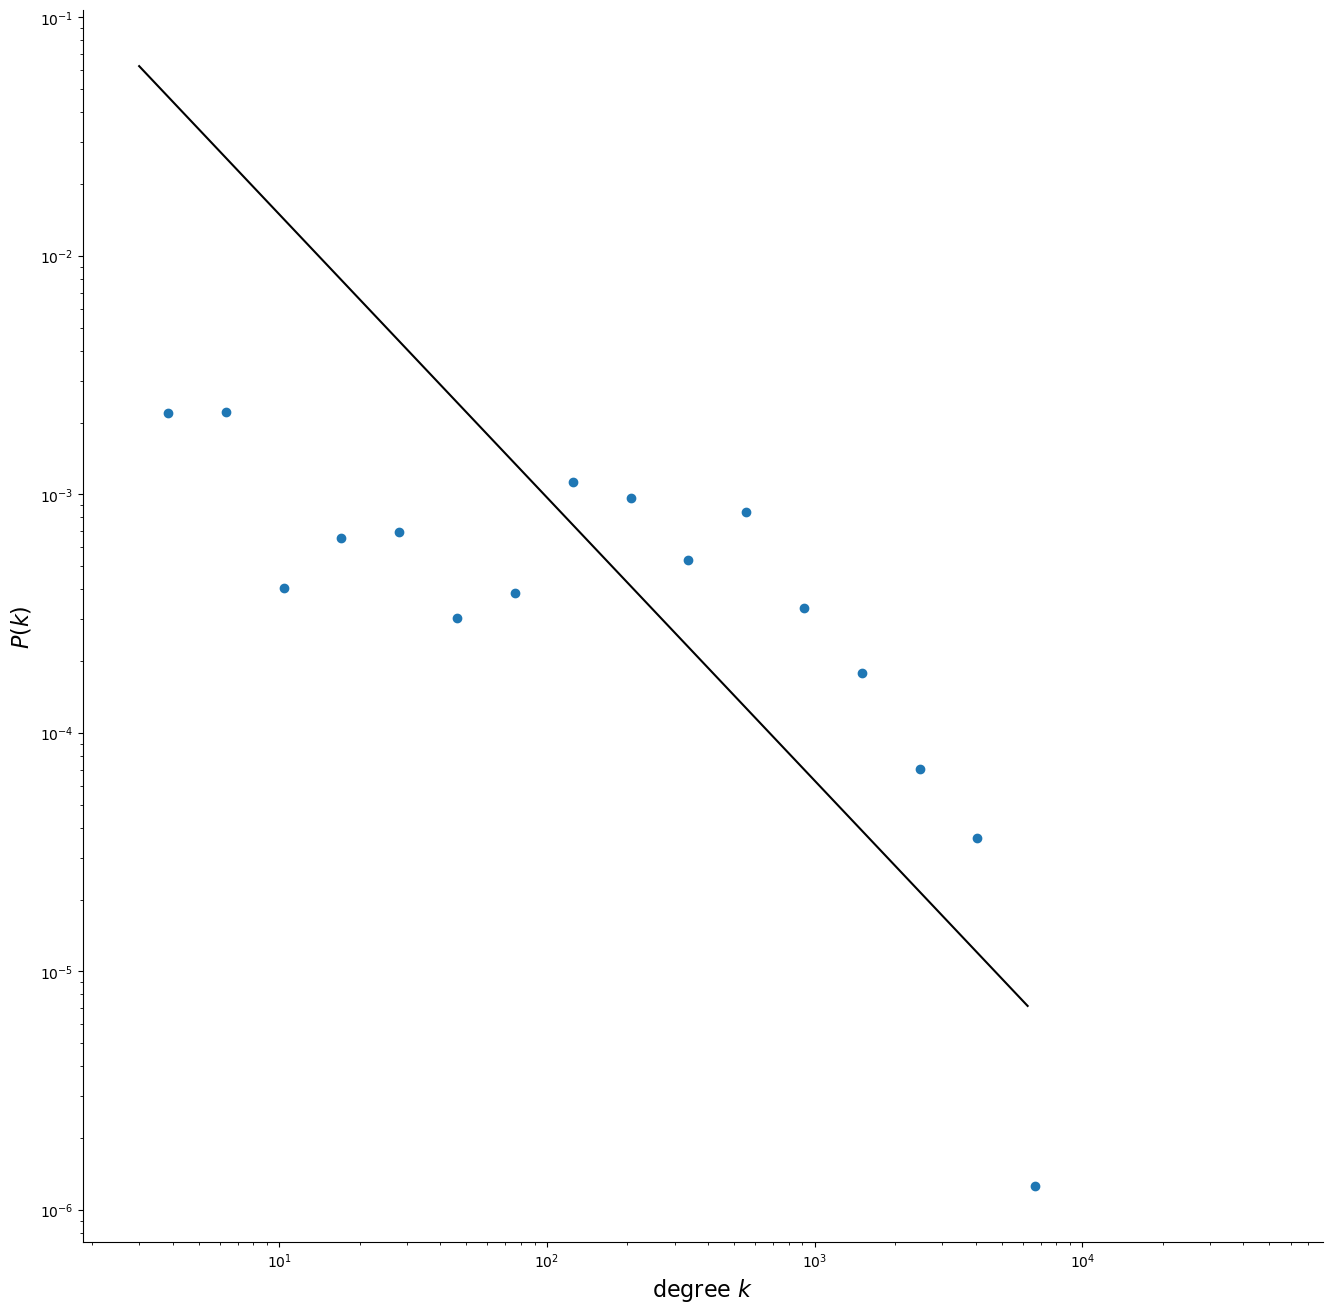

In [38]:
DP = G.copy() # the function edits the graph in place

nx.connected_double_edge_swap(DP,nswap=10*G.number_of_edges())
plot_degree_dist(DP)
plot_degree_dist(G)

In [42]:
clustering_DP = []
short_path_DP = []

for i in range(100): # 1000 is better
    nx.connected_double_edge_swap(DP,nswap=G.number_of_edges())
    
    C_DP = np.mean(list(nx.clustering(DP).values()))
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))

0.786030117354293
0.00015782485799620196
1.5802242543387566
8.482515146064581e-05
